In [17]:
import os
import sys
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

project_root = ".."
sys.path.append(project_root)
from sleeprnn.common import viz

DATASETS_PATH = os.path.join(project_root, 'resources', 'datasets', 'nsrr')

viz.notebook_full_width()

# Check metadata column names

In [99]:
dataset_name = 'ccshs'

print("Check %s" % dataset_name)

metadata_dir = os.path.abspath(os.path.join(DATASETS_PATH, dataset_name, 'datasets'))
all_files = os.listdir(metadata_dir)
all_files.sort()

# variables
var_file = [f for f in all_files if ('variables' in f) and ('dictionary' in f) and ('.csv' in f)]
pprint(var_file)

var_file = os.path.join(metadata_dir, var_file[0])

var_df = pd.read_csv(var_file)

# var_df = var_df[[('Demographics' in s) for s in var_df['folder']]]
var_df = var_df[[('Demographics' in s) for s in var_df['folder']]]
print(var_df[[
    'folder', 
    'id', 
    'display_name', 
    'type',
    'description',
]])
# print(var_df.loc[202])

# Dataset file
dataset_file = [f for f in all_files if ('dataset' in f) and ('.csv' in f)]
print("Datasets:")
pprint(dataset_file)

Check ccshs
['ccshs-data-dictionary-0.6.0-variables.csv']
          folder         id          display_name     type  \
18  Demographics        age  Age at time of visit  numeric   
19  Demographics  ethnicity             Ethnicity  choices   
20  Demographics       male           Male gender  choices   
21  Demographics      race3                  Race  choices   

                                          description  
18                                                NaN  
19                                                NaN  
20                                                NaN  
21  Race was collapsed into these three categories...  
Datasets:
['ccshs-trec-dataset-0.6.0.csv']


In [103]:
# check columns
id_name = 'male'
categorical = True

meta_df = pd.read_csv(os.path.join(metadata_dir, 'ccshs-trec-dataset-0.6.0.csv'))
# [n for n in meta_df.columns if 'V8' in n]
meta_df[id_name]
# meta_df

0      0
1      1
2      1
3      1
4      0
      ..
512    1
513    1
514    1
515    1
516    1
Name: male, Length: 517, dtype: int64

Total NaNs: 0 out of 517
Value 0 with non-nan proportion 0.4952
Value 1 with non-nan proportion 0.5048


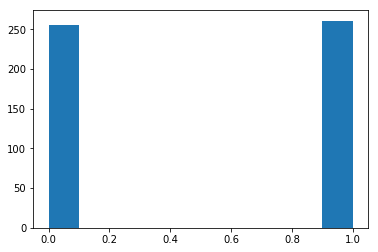

In [104]:
col_vals = meta_df[id_name].values
loc_nan = np.isnan(col_vals)
print("Total NaNs: %d out of %d" % (loc_nan.sum(), loc_nan.size))

if categorical:
    col_vals = col_vals[~loc_nan]
    unique_vals = np.unique(col_vals)
    for v in unique_vals:
        print("Value %s with non-nan proportion %1.4f" % (v, (col_vals==v).mean()))

plt.hist(col_vals)
plt.show()

# Check metadata

In [115]:
folder = 'ccshs'
fname = 'ccshs-trec-dataset-0.6.0.csv'
age_name = 'age'
sex_name = 'male'
# sex_map = {1: 'M', 2: 'F'}

metadata_path = os.path.abspath(os.path.join(DATASETS_PATH, folder, 'datasets', fname))
metadata_df = pd.read_csv(metadata_path)
metadata_df = metadata_df[['nsrrid', age_name, sex_name]]
metadata_df.head()

,nsrrid,age,male
0,1800001,17.21,0
1,1800005,17.28,1
2,1800007,17.54,1
3,1800013,17.76,1
4,1800014,17.13,0
